<a href="https://colab.research.google.com/github/Dhruv-Mahajan1/CIFAR-tensorflow/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print(train_images.shape)

(50000, 32, 32, 3)


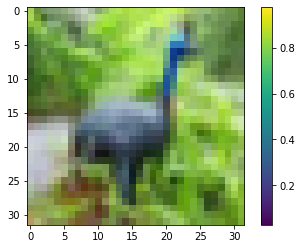

In [ ]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

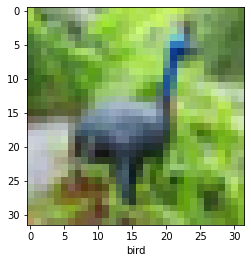

In [ ]:
IMG_INDEX = 6  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

CNN Architecture


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


adding dense layers


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

Trainning model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.7607 - accuracy: 0.3466
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1928 - accuracy: 0.5755
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0264 - accuracy: 0.6403
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9171 - accuracy: 0.6754
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8431 - accuracy: 0.7047
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7876 - accuracy: 0.7249
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7209 - accuracy: 0.7462
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6808 - accuracy: 0.7630
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6434 - accuracy: 0.7738
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [ ]:
loss,accuracy = model.evaluate(test_images,  test_labels, verbose=2)
print(accuracy)

313/313 - 4s - loss: 0.9098 - accuracy: 0.6965
0.6965000033378601


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5726 - accuracy: 0.7975
Epoch 2/3
1563/1563 [==============================] - 63s 41ms/step - loss: 0.5254 - accuracy: 0.8141
Epoch 3/3
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4995 - accuracy: 0.8236


In [ ]:
loss,accuracy = model.evaluate(test_images,  test_labels, verbose=2)
print(accuracy*100)

313/313 - 4s - loss: 0.9187 - accuracy: 0.7107
71.069997549057


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4689 - accuracy: 0.8348
Epoch 2/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.4364 - accuracy: 0.8464
Epoch 3/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.4092 - accuracy: 0.8545
Epoch 4/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.3809 - accuracy: 0.8651
Epoch 5/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.3631 - accuracy: 0.8717
Epoch 6/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.3375 - accuracy: 0.8804
Epoch 7/20
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3095 - accuracy: 0.8878
Epoch 8/20
1563/1563 [==============================] - 63s 41ms/step - loss: 0.2911 - accuracy: 0.8970
Epoch 9/20
1563/1563 [==============================] - 63s 41ms/step - loss: 0.2737 - accuracy: 0.9017
Epoch 10/20
1563/1563 [==============================] - 63s 40m

In [ ]:
loss,accuracy = model.evaluate(test_images,  test_labels, verbose=2)
print(accuracy*100)

313/313 - 4s - loss: 1.9362 - accuracy: 0.6887
68.8700020313263
